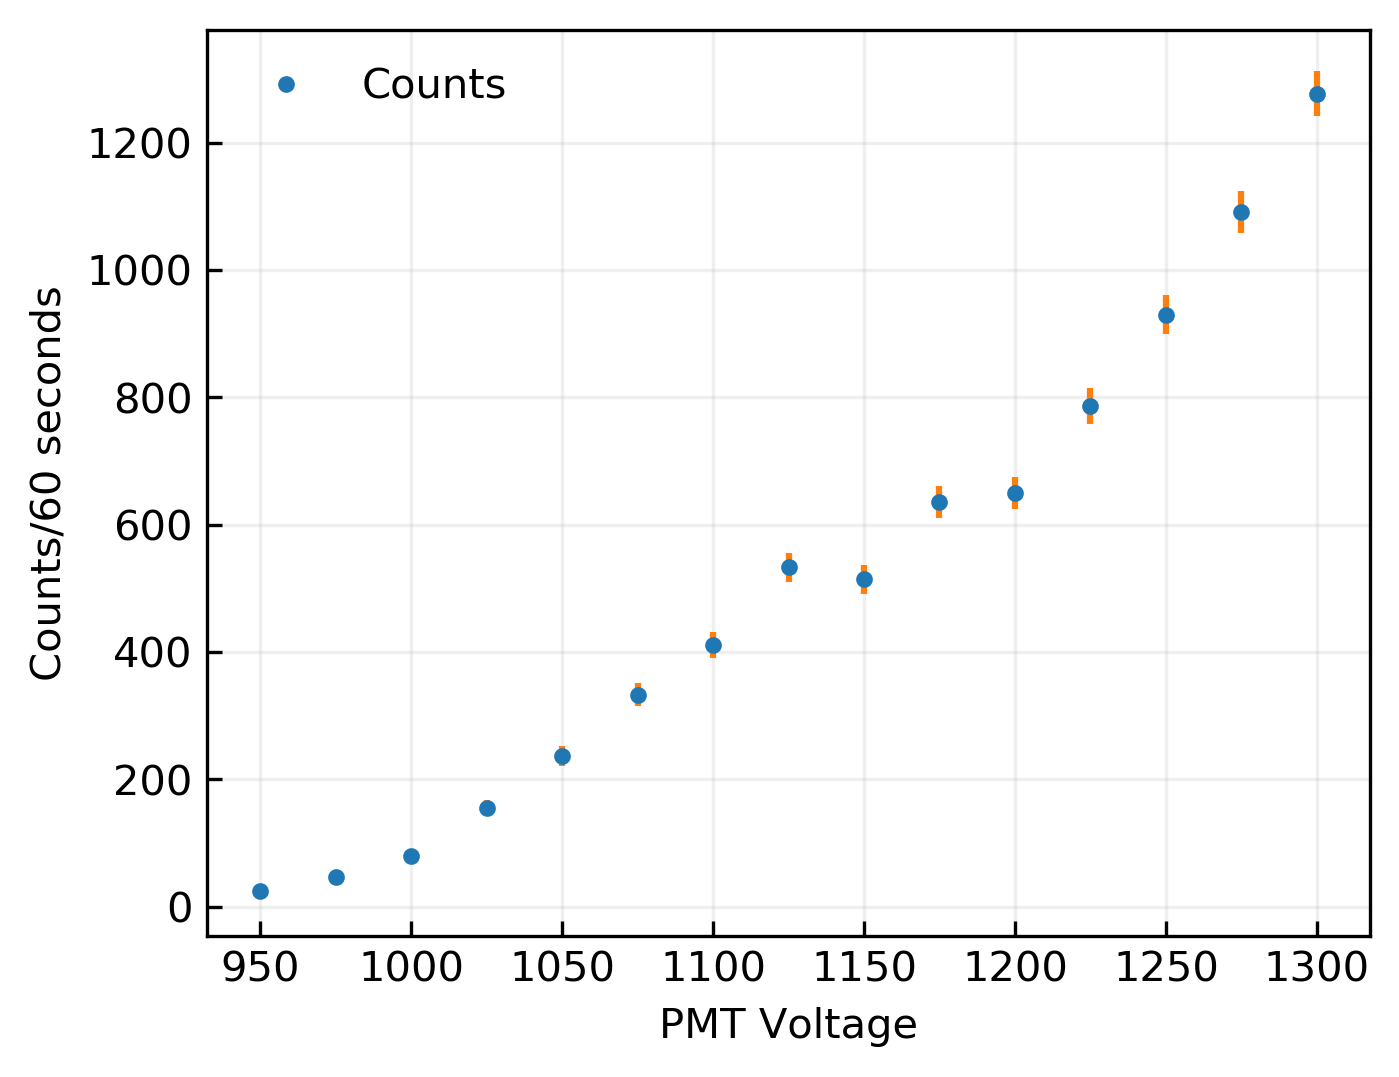

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt;

PMT_Voltage = np.arange(650,1025,25)
#Counts20 = np.array([7,10,6,7,10,10,17,12,21,30,30,30,42,60,88])
#Counts20_err = Counts20**(0.5)

def plotbig(ax, x, y, seconds):
    
    ax.plot(x, y, '.', label = "Counts")
    ax.errorbar(x, y, yerr = y**(0.5), fmt='none')
    
    ax.set(xlabel = "PMT Voltage", ylabel="Counts/60 seconds")
    ax.grid()

Counts60 = [
    (400, 22),    (500, 34),    (600, 30),    (625, 26),    (650, 28),
    (675, 28),    (700, 32),    (725, 34),    (750, 33),    (775, 33),
    (800, 47),    (825, 55),    (850, 53),    (875, 69),    (900, 76),
    (925, 121),    (950, 158),    (975, 187),    (1000, 290)]

res60  = list(zip(*Counts60))
#print(res60)

x1 = np.array(res60[0])
y1 = np.array(res60[1])

Counts60_n = [
    (950, 24),
    (975, 47),
    (1000, 80),
    (1025, 155),
    (1050, 237),
    (1075, 333),
    (1100, 411),
    (1125, 533), #487
    (1150, 514), #515
    (1175, 635), #581
    (1200, 650), #602
    (1225, 787), #778
    (1250, 930), #922
    (1275, 1091),
    (1300, 1277) #1234
]

res60_n  = list(zip(*Counts60_n))

x = np.array(res60_n[0])
y = np.array(res60_n[1])



# Function we are trying to fit to data.
def func(x, a, b, c, d, e,f, g):
    #return a * np.exp(-b * x) + c
    #return a*np.log(x)+c
    return a*(x**6)+ b*(x**5)+ c*(x**4) + d*(x**3) +e*(x**2) +f*x+ g
    

def func2(x, a, b):
    #return a * np.exp(-b * x) + c
    return a*x +b
    

# Curve fitting 
optimizedParameters, pcov = opt.curve_fit(func, x, y);
optimizedParameters2, pcov2 = opt.curve_fit(func2, x, y);



fig, ax = plt.subplots(figsize = (5,4), dpi=300)
#plotbig(ax, x1, y1, 60)
plotbig(ax, x, y, 60)

# Use  optimized parameters to plot the best fit
#plt.plot(x, func(x, *optimizedParameters), label="fit");
#plt.plot(x, func2(x, *optimizedParameters2), label="linear fit");

ax.tick_params(direction="in", which="both")
ax.grid(alpha=0.2)
ax.legend(frameon=False)

plt.savefig("./reports/Plateau60.png")

In [67]:
def func(x, a, b, c,d,e,f,g):
    return a*(x**6)+ b*(x**5)+ c*(x**4) + d*(x**3) +e*(x**2) +f*x+ g
    #return a*x +b
    
optimizedParameters, pcov = opt.curve_fit(func, x, y);
print(optimizedParameters)

#print(x)
#print(y)

#print(func(x, *optimizedParameters))

[ -8.34615554e-09   8.17468407e-10   2.87142709e-09  -3.22560538e-08
   4.44101519e-03  -6.62885526e+00   2.33154114e+03]


No handles with labels found to put in legend.


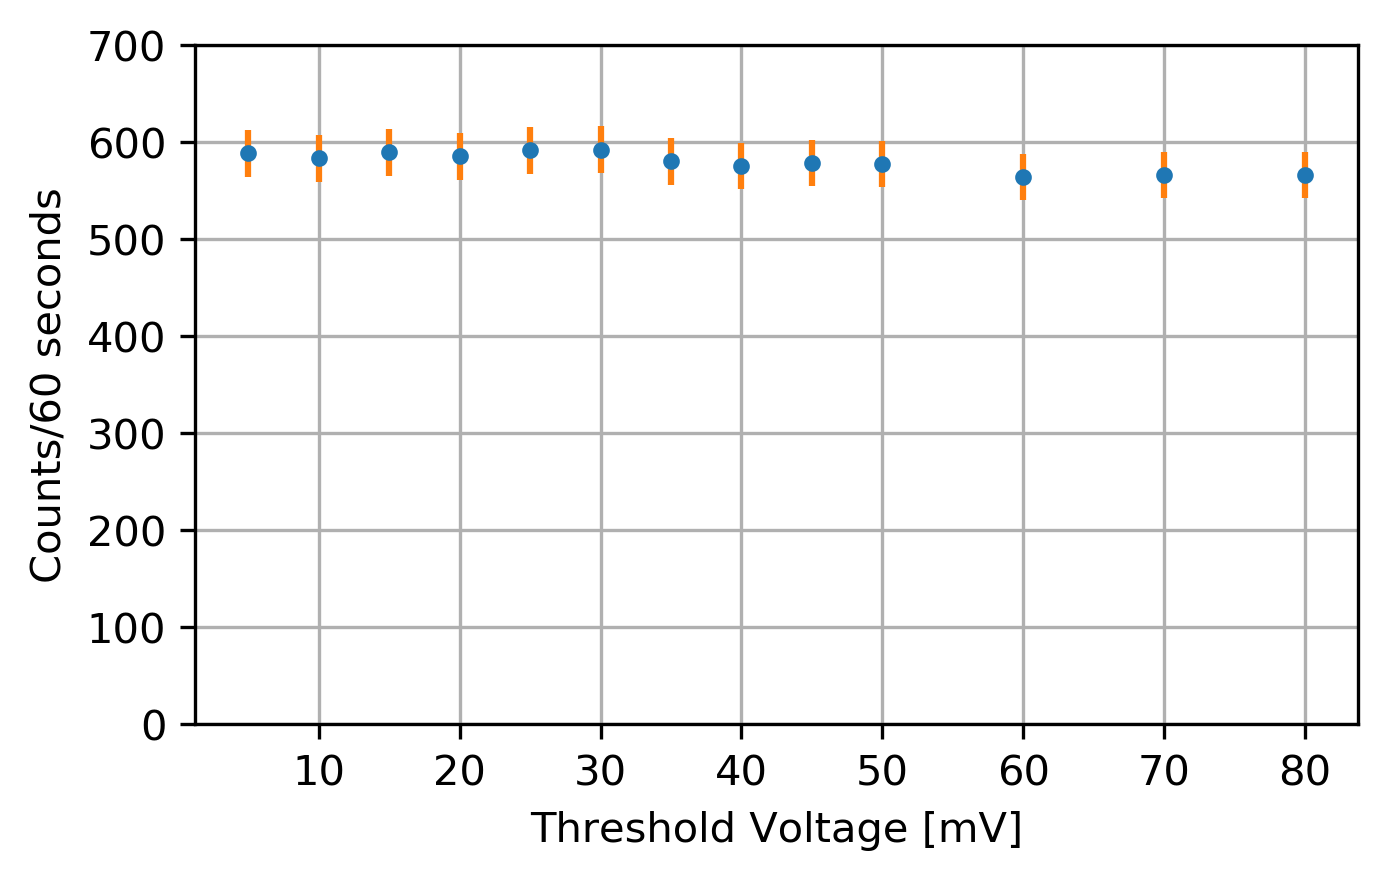

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#counts for 60sec, 1170 V to PMT
# counts vs threshold voltage [mV]
#change threshold from 5 to 20mV
#keeping voltage constant at 1170V

counts60_t = [
(5, 588), #558
(10, 583),
(15, 589),
(20, 585),
(25, 591),
(30, 592),
(35, 580),
(40, 575),
(45, 578),
(50, 577),
(60, 564),
(70, 566),
(80, 566)
]

res60_t  = list(zip(*counts60_t))

x = np.array(res60_t[0])
y = np.array(res60_t[1])

plt.figure(1, figsize=(5,3), dpi=300) #setting the size of the plot figure
plt.plot(x,y, '.')
plt.errorbar(x, y, yerr = y**(0.5), fmt='none')
    
plt.legend(frameon=False)
plt.xlabel('Threshold Voltage [mV]')
plt.ylabel('Counts/60 seconds')
plt.grid()
plt.ylim(0,700)

plt.savefig("./reports/ThresholdPlateau.png")
plt.show()
